In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint as pp
import seaborn as sns

In [2]:
import pingouin as pg

In [3]:
ssr = pd.read_csv("20230705-sparkshark20seedpartialrunparametergridRESULTS.csv")

/tmp/ipykernel_146772/3741410407.py:1: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  ssr = pd.read_csv("20230705-sparkshark20seedpartialrunparametergridRESULTS.csv")


In [4]:
ssr.columns

Index(['Unnamed: 0', 'PartitionKey', 'RowKey',
       'Expectations_RiskyAvg_mean_final', 'Expectations_RiskyAvg_std_final',
       'Expectations_RiskyStd_mean_final', 'Expectations_RiskyStd_std_final',
       'aLvl_meanall', 'aLvl_stdall', 'ammps', 'ammps_config_cmd',
       'ammps_config_gen', 'attention', 'cmdBundle', 'delta_t1', 'delta_t2',
       'dividend_growth_rate', 'dividend_shock_std',
       'dollars_per_hark_money_unit', 'dphm', 'end_day', 'endtime',
       'expectations', 'experimentName', 'filename', 'idx_max_asset_price',
       'idx_max_buy_limit', 'idx_max_sell_limit', 'idx_min_asset_price',
       'inst_val_std', 'kurtosis_buy_limit', 'kurtosis_sell_limit',
       'log_return_DW_statistic', 'log_return_autocorrelation_from_DW',
       'log_return_squared_DW_statistic',
       'log_return_squared_autocorrelation_from_DW', 'mNrm_ratio_StE_meanall',
       'mNrm_ratio_StE_stdall', 'market_class', 'max_asset_price',
       'max_buy_limit', 'max_sell_limit', 'mean_asset_p

In [5]:
ssr.shape

(69120, 78)

<Axes: >

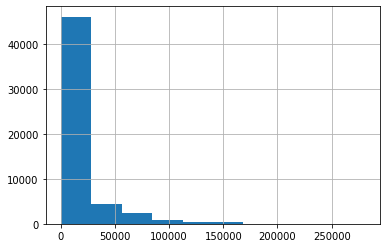

In [6]:
ssr['max_buy_limit'].hist()

In [7]:
np.log(ssr['dphm'].unique())

array([6.90775528, 7.6861623 , 8.90774769])

In [8]:
ssr['pop_aNrmInitMean'].unique()

array([4, 5, 7, 6])

In [9]:
# a fake variable to get the effects of these two related variables
ssr['mm_log_lucas_power'] = np.log(ssr['mmsize'] * np.exp(ssr['mmlucasfactor']))

# a fake variable to get the effects of these two related variables
ssr['pop_log_power'] = np.log(ssr['dollars_per_hark_money_unit'] * np.exp(ssr['pop_aNrmInitMean']))


ssr['log_mean_aLvl_lost'] = np.log(np.exp(ssr['pop_aNrmInitMean']) - ssr['total_population_aLvl_mean'])

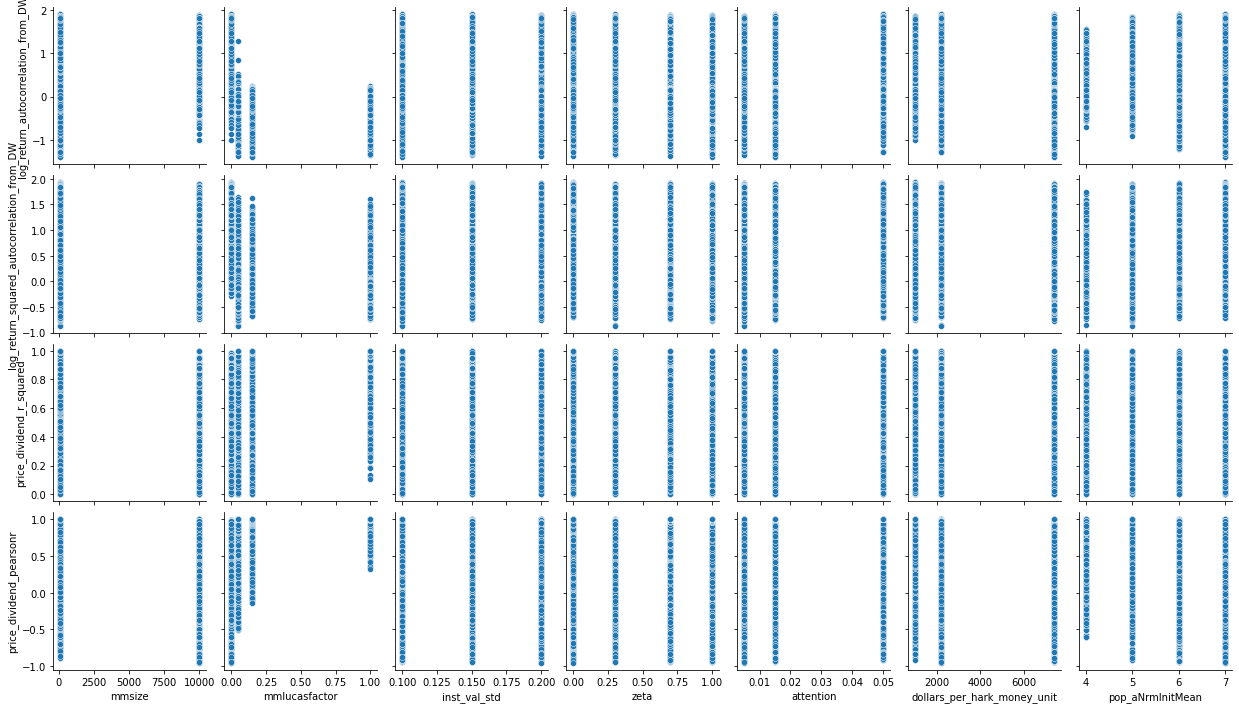

In [10]:
sns.pairplot(
    data = ssr,
    x_vars = [
        'mmsize',
        "mmlucasfactor",
        "inst_val_std",
        "zeta",
        'attention',
        'dollars_per_hark_money_unit',
        'pop_aNrmInitMean'
    ],
    y_vars = [
        'log_return_autocorrelation_from_DW',
        'log_return_squared_autocorrelation_from_DW',
        'price_dividend_r_squared',
        'price_dividend_pearsonr'
    ]
)

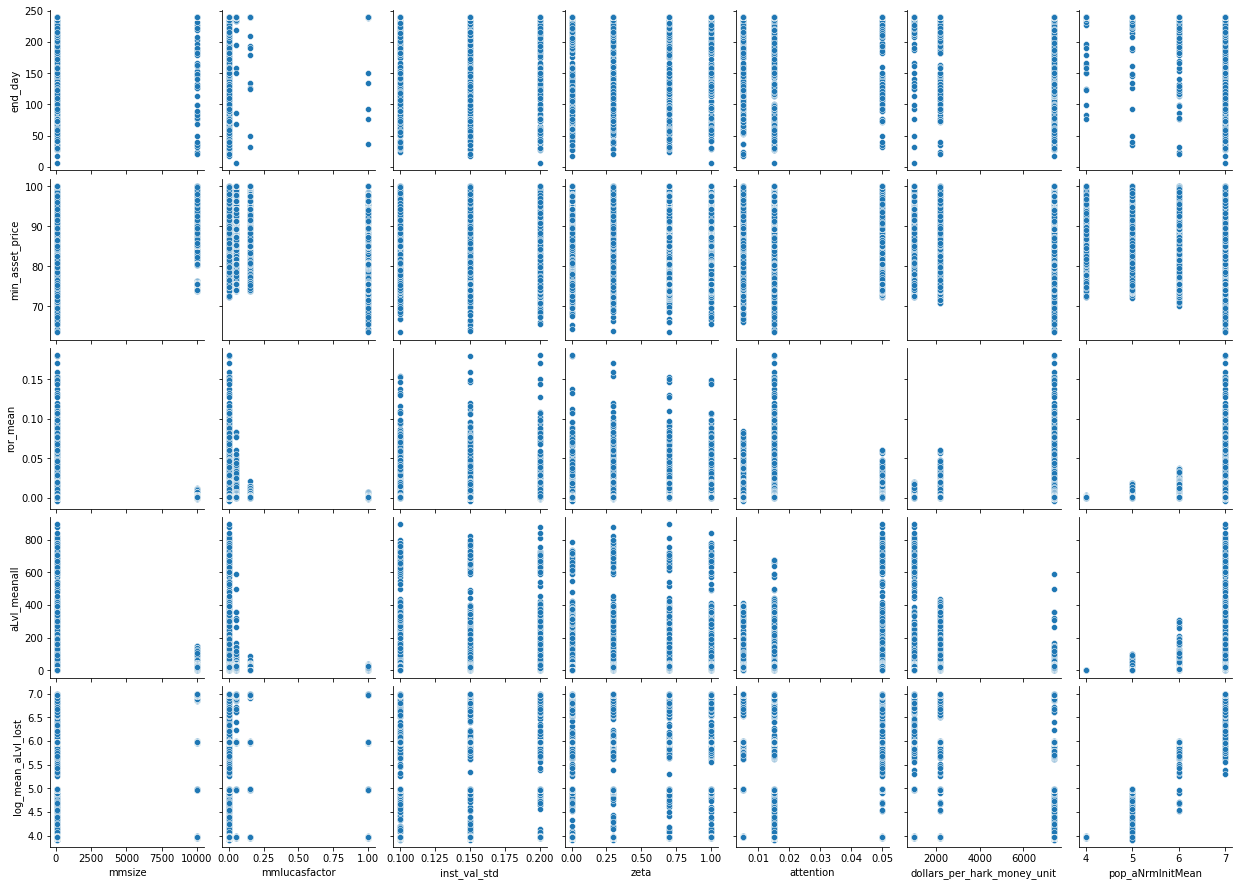

In [11]:
sns.pairplot(
    data = ssr,
    x_vars = [
        'mmsize',
        "mmlucasfactor",
        "inst_val_std",
        "zeta",
        'attention',
        'dollars_per_hark_money_unit',
        'pop_aNrmInitMean'
    ],
    y_vars = [
        'end_day',
        'min_asset_price',
        'ror_mean',
        #'ror_volatility',
        'aLvl_meanall',
        #'aLvl_stdall',
        'log_mean_aLvl_lost'
    ]
)

<Axes: xlabel='log_mean_aLvl_lost', ylabel='Density'>

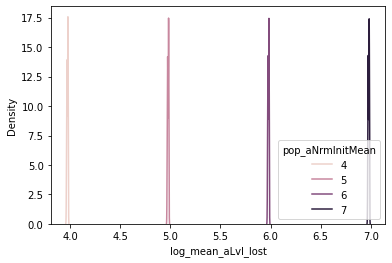

In [12]:
ssr['log_aLvlmeanall'] = np.log(ssr['aLvl_meanall'])

sns.kdeplot(
    data = ssr[(ssr['dphm'] < 2000) &
               (ssr['mmlucasfactor'] == 1.0) &
               (ssr['mmsize'] == 10000) &
               (ssr['attention'] < 0.01) &
               (ssr['zeta'] < 0.01)
              ],
    x =  'log_mean_aLvl_lost',
    hue = 'pop_aNrmInitMean'
)

<Axes: xlabel='max_sell_limit', ylabel='Density'>

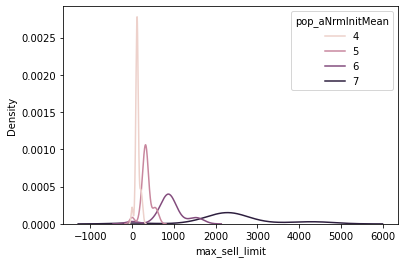

In [13]:
ssr['log_aLvlmeanall'] = np.log(ssr['aLvl_meanall'])

sns.kdeplot(
    data = ssr[(ssr['dphm'] < 2000) &
               (ssr['mmlucasfactor'] == 0.0) &
               (ssr['mmsize'] == 105) &
               (ssr['attention'] < 0.01) &
               (ssr['zeta'] < 0.01)
              ],
    x = 'max_sell_limit',
    hue = 'pop_aNrmInitMean'
)

<Axes: xlabel='log_mean_aLvl_lost', ylabel='Density'>

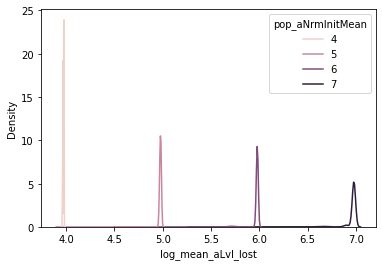

In [14]:
ssr['log_aLvlmeanall'] = np.log(ssr['aLvl_meanall'])

sns.kdeplot(
    data = ssr,
    x = 'log_mean_aLvl_lost',
    hue = 'pop_aNrmInitMean'
)

/home/sb/projects/ufm/SHARKFin/sharkfin-env/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='log_max_sell_limit', ylabel='Density'>

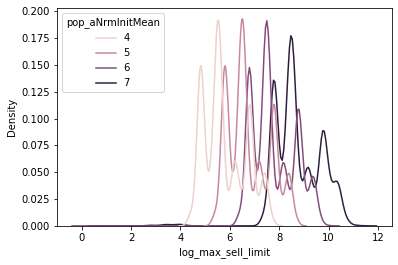

In [15]:
ssr['log_max_sell_limit'] = np.log(ssr['max_sell_limit'])

sns.kdeplot(
    data = ssr,
    x = 'log_max_sell_limit',
    hue = 'pop_aNrmInitMean'
)

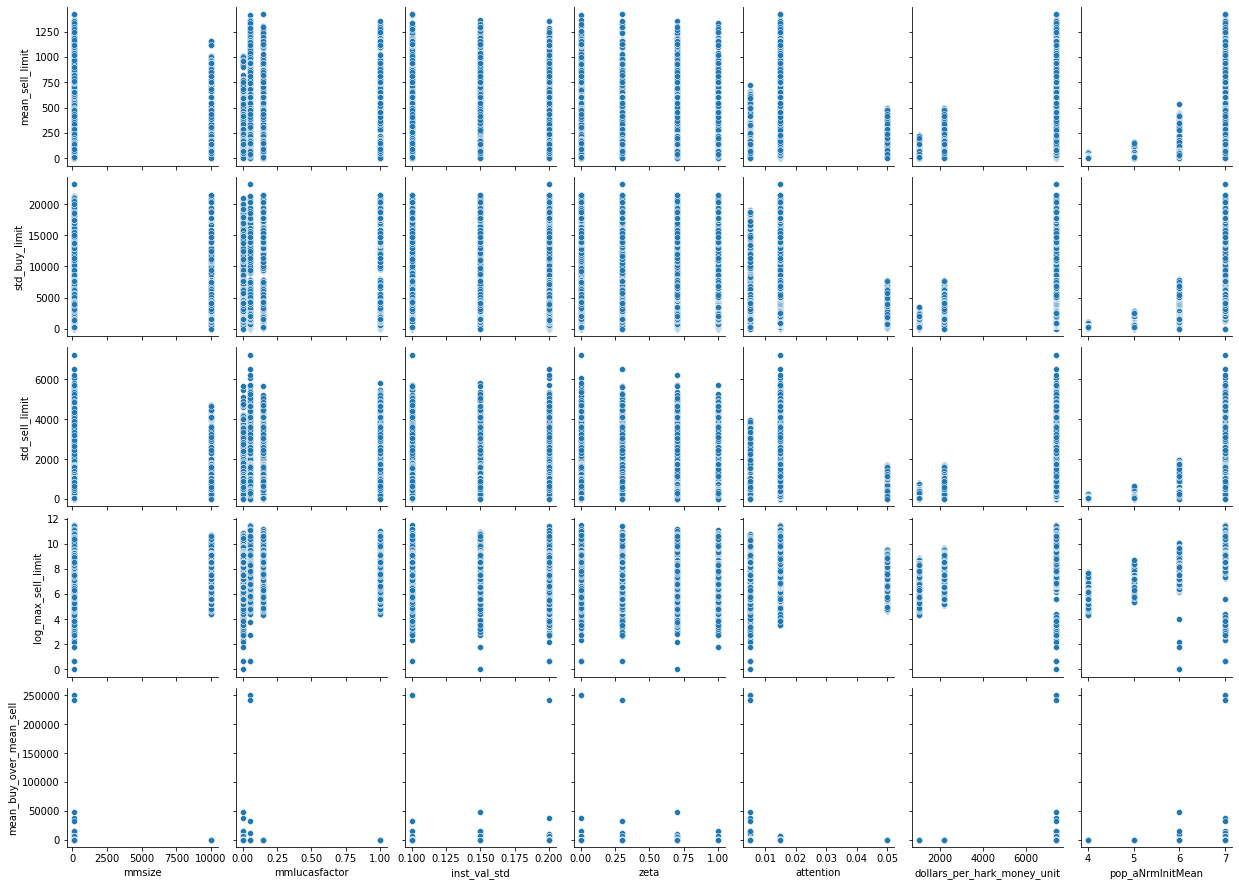

In [16]:
ssr['mean_buy_over_mean_sell'] = ssr['mean_buy_limit'] / ssr['mean_sell_limit']

sns.pairplot(
    data = ssr,
    x_vars = [
        'mmsize',
        "mmlucasfactor",
        "inst_val_std",
        "zeta",
        'attention',
        'dollars_per_hark_money_unit',
        'pop_aNrmInitMean'
    ],
    y_vars = [
        'mean_sell_limit',
        'std_buy_limit',
        'std_sell_limit',
        'log_max_sell_limit',
        'mean_buy_over_mean_sell'
    ]
)

<Axes: xlabel='max_sell_limit', ylabel='Density'>

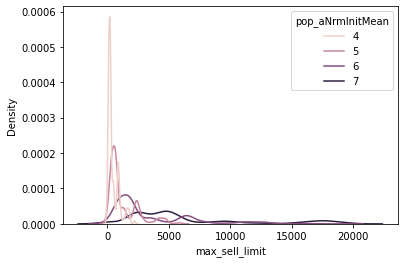

In [20]:
sns.kdeplot(
    data = ssr[(ssr['max_sell_limit']) < 20000],
    x = 'max_sell_limit',
    hue = 'pop_aNrmInitMean'
)

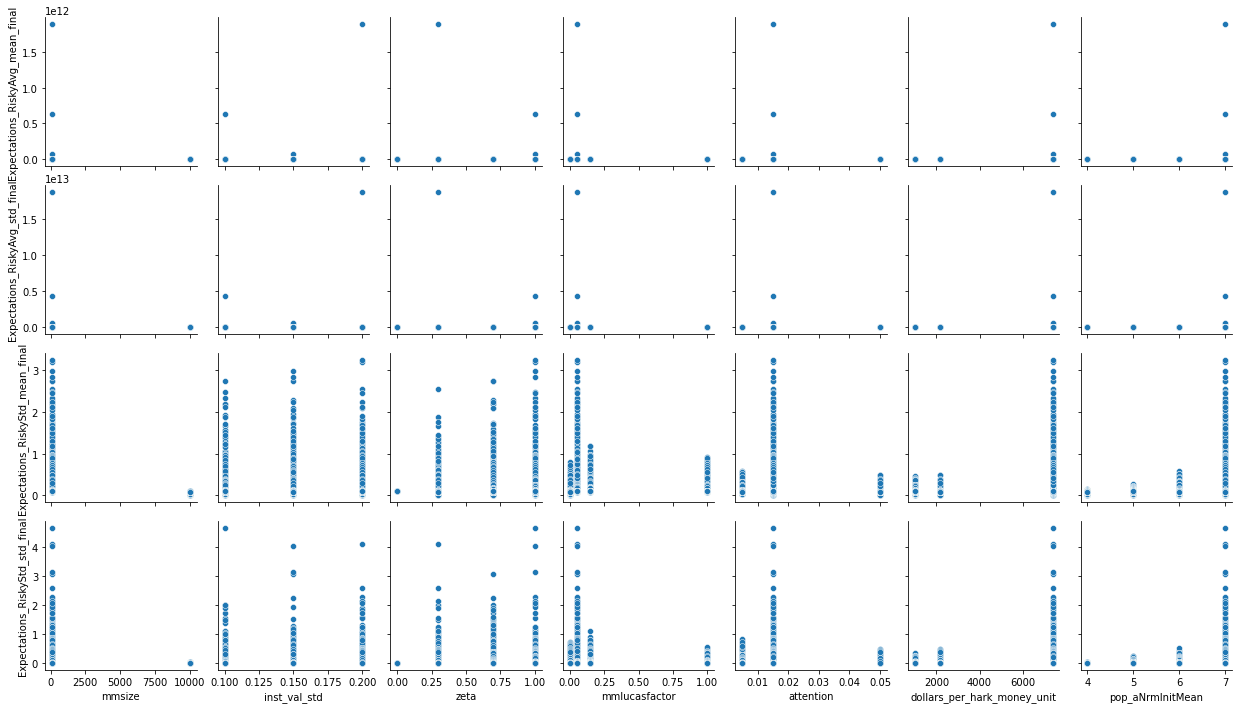

In [11]:
sns.pairplot(
    data = ssr,
    x_vars = [
        'mmsize',
        "inst_val_std",
        "zeta",
        "mmlucasfactor",
        'attention',
        'dollars_per_hark_money_unit',
        'pop_aNrmInitMean'
    ],
    y_vars = [
        'Expectations_RiskyAvg_mean_final',
        'Expectations_RiskyAvg_std_final',
        'Expectations_RiskyStd_mean_final',
        'Expectations_RiskyStd_std_final',
    ]
)

MemoryError: Unable to allocate 13.6 PiB for an array with shape (1917196573710939,) and data type float64

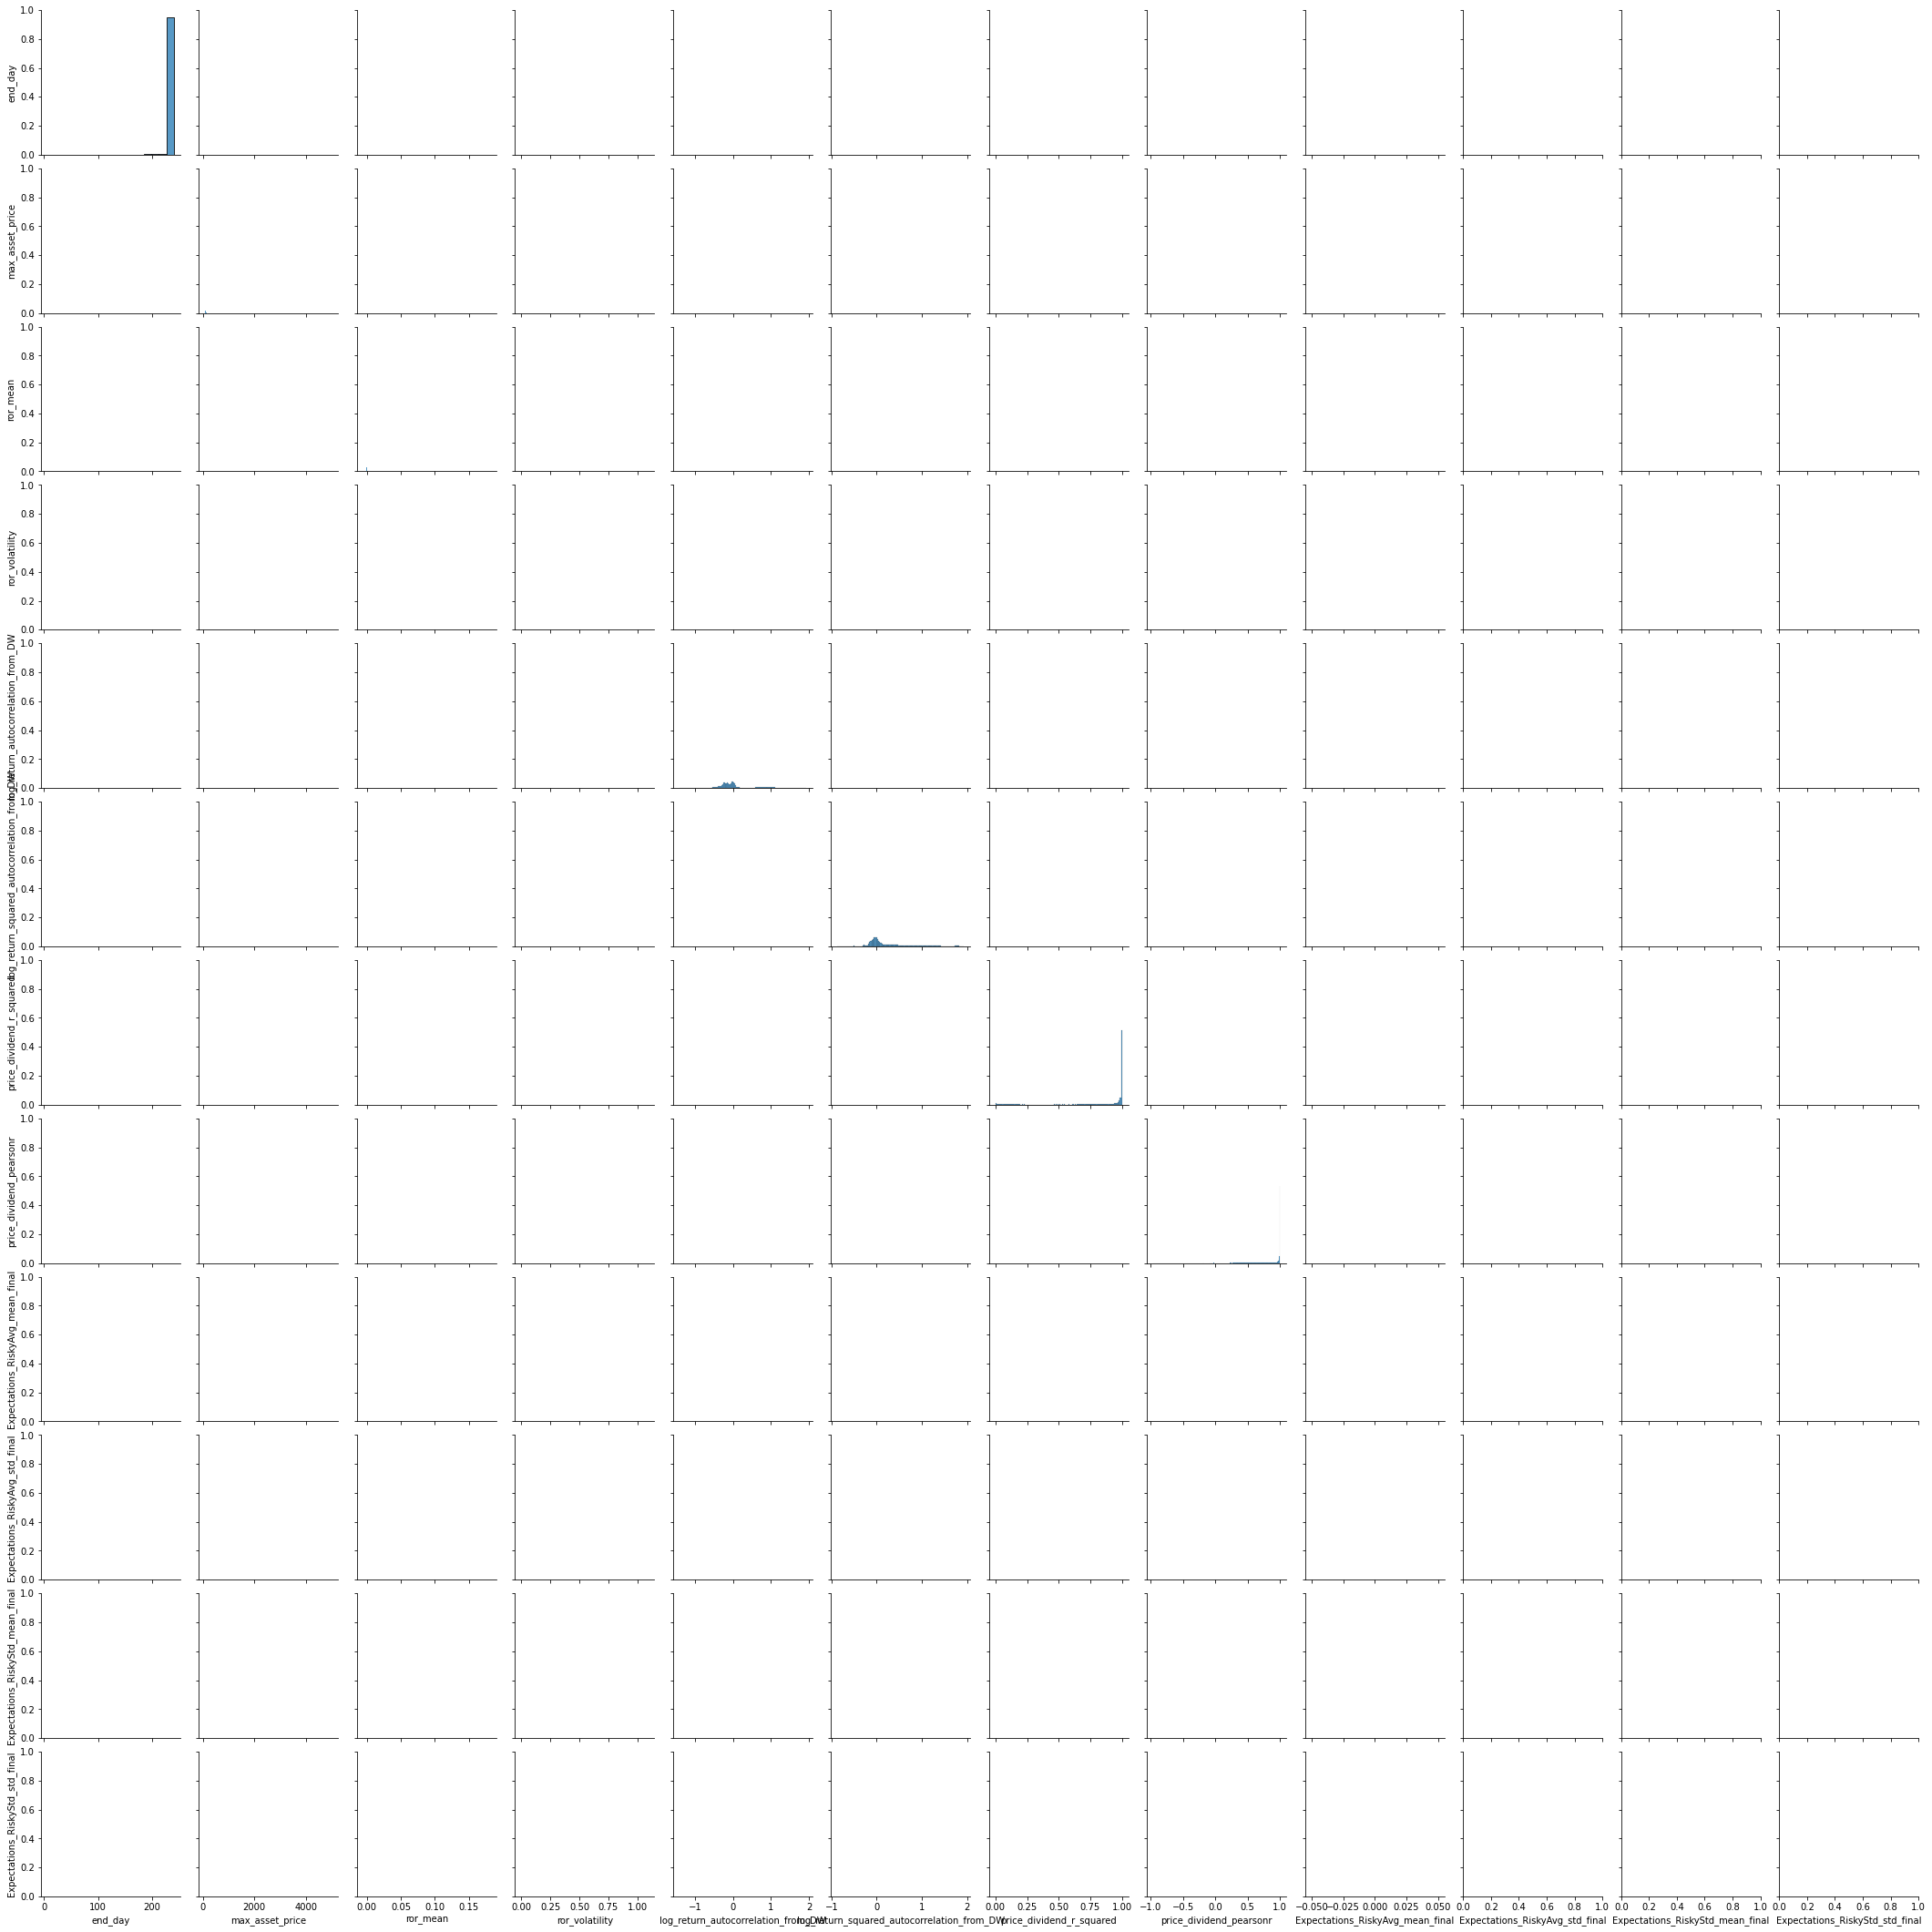

In [12]:
sns.pairplot(
    data = ssr[[
        'end_day',
        'max_asset_price',
        'ror_mean',
        'ror_volatility',
        'log_return_autocorrelation_from_DW',
        'log_return_squared_autocorrelation_from_DW',
        'price_dividend_r_squared',
        'price_dividend_pearsonr',
        'Expectations_RiskyAvg_mean_final',
        'Expectations_RiskyAvg_std_final',
        'Expectations_RiskyStd_mean_final',
        'Expectations_RiskyStd_std_final',
        #''
    ]]
)

In [ ]:
sns.kdeplot(
    data = ssr,
    x = 'price_dividend_r_squared',
    hue = 'mmlucasfactor'
)

In [ ]:
sns.kdeplot(
    data = ssr,
    x = 'price_dividend_r_squared',
    hue = 'mm_log_lucas_power'
)

<Axes: xlabel='price_dividend_r_squared', ylabel='Density'>

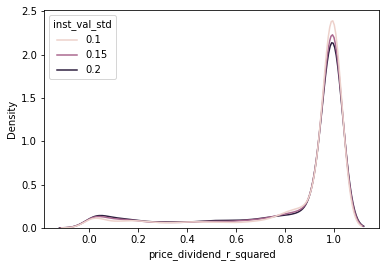

In [17]:
sns.kdeplot(
    data = ssr,
    x = 'price_dividend_r_squared',
    hue = 'inst_val_std'
)

In [ ]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'mmsize',
        columns = 'mmlucasfactor',
        values = 
    )
)

<Axes: xlabel='pop_log_power', ylabel='mm_log_lucas_power'>

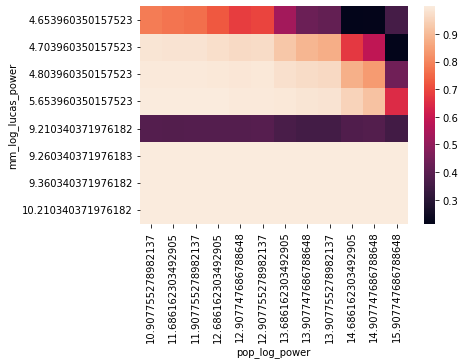

In [19]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'mm_log_lucas_power',
        columns = 'pop_log_power',
        values = 'price_dividend_r_squared'
    )
)

<Axes: xlabel='pop_log_power', ylabel='mmlucasfactor'>

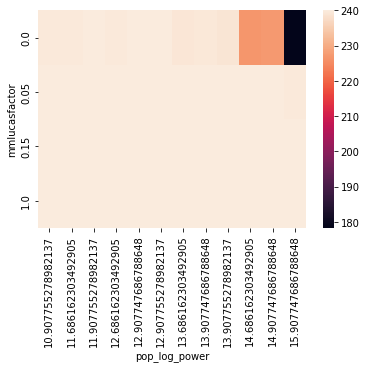

In [20]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'mmlucasfactor',
        columns = 'pop_log_power',
        values = 'end_day'
    )
)

<Axes: xlabel='pop_log_power', ylabel='mmsize'>

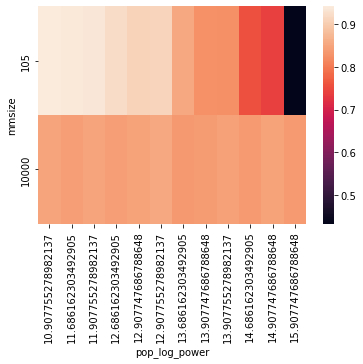

In [18]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'mmsize',
        columns = 'pop_log_power',
        values = 'price_dividend_r_squared'
    )
)

<Axes: xlabel='inst_val_std', ylabel='attention'>

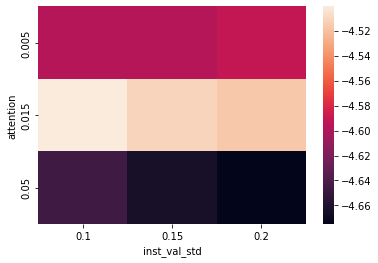

In [23]:
## This is interesting.
ssr['log_ror_volatility'] = np.log(ssr['ror_volatility'])
sns.heatmap(
    data = ssr.pivot_table(
        index = 'attention',
        columns = 'inst_val_std',
        values = 'log_ror_volatility'
    )
)

<Axes: xlabel='zeta', ylabel='attention'>

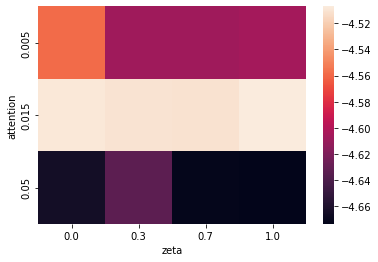

In [24]:
## This is interesting.

sns.heatmap(
    data = ssr.pivot_table(
        index = 'attention',
        columns = 'zeta',
        values = 'log_ror_volatility'
    )
)

<Axes: xlabel='zeta', ylabel='pop_log_power'>

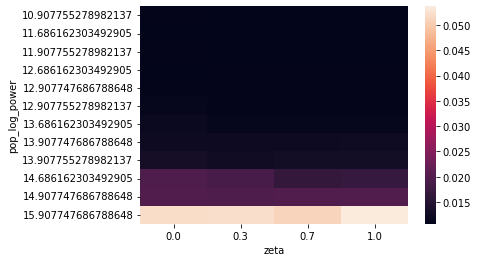

In [63]:

sns.heatmap(
    data = ssr.pivot_table(
        index = 'pop_log_power',
        columns = 'zeta',
        values = 'ror_volatility'
    )
)

<Axes: xlabel='attention', ylabel='pop_log_power'>

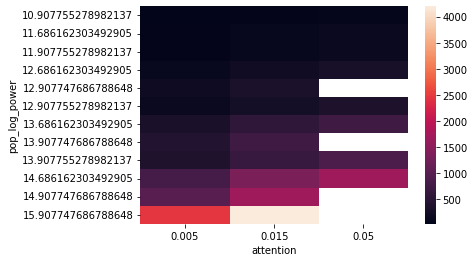

In [67]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'pop_log_power',
        columns = 'attention',
        values = 'mean_buy_limit'
    )
)

<Axes: xlabel='attention', ylabel='pop_log_power'>

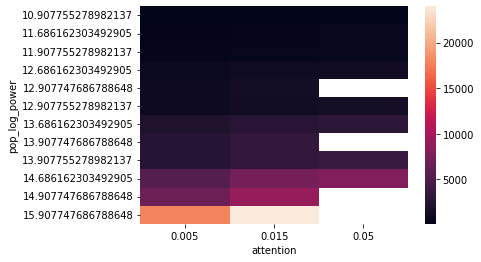

In [124]:
sns.heatmap(
    data = ssr[ssr['mm']].pivot_table(
        index = 'pop_log_power',
        columns = 'attention',
        values = 'max_sell_limit'
    )
)

In [73]:
ssr[ssr['end_day']< 100][['end_day','mean_buy_limit']]

,end_day,mean_buy_limit
2011,24.0,3.040000
6032,58.0,3413.881356
6036,61.0,2375.064516
6041,94.0,1862.115789
6043,66.0,2209.477612
...,...,...
50921,73.0,2319.567568
50931,99.0,1313.620000
51010,92.0,1697.731183
51053,40.0,246.878049


<Axes: xlabel='log_ror_volatility', ylabel='Density'>

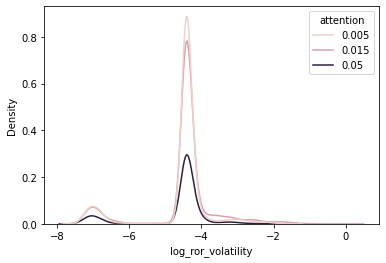

In [25]:
sns.kdeplot(
    data = ssr,
    x = 'log_ror_volatility',
    hue = 'attention'
)

In [ ]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'zeta',
        columns = 'pop_log_power',
        values = 'price_dividend_r_squared'
    )
)

In [ ]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'mm_log_lucas_power',
        columns = 'pop_log_power',
        values = 'ror_mean'
    )
)

In [ ]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'mm_log_lucas_power',
        columns = 'pop_log_power',
        values = 'ror_volatility'
    )
)

In [ ]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'mm_log_lucas_power',
        columns = 'pop_log_power',
        values = 'log_return_autocorrelation_from_DW',
    )
)

In [ ]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'mm_log_lucas_power',
        columns = 'pop_log_power',
        values = 'log_return_squared_autocorrelation_from_DW',
    )
)

In [ ]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'mm_log_lucas_power',
        columns = 'pop_log_power',
        values = 'Expectations_RiskyAvg_mean_final',
    )
)

In [ ]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'mm_log_lucas_power',
        columns = 'pop_log_power',
        values = 'Expectations_RiskyAvg_std_final',
    )
)

In [ ]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'mm_lucas_factor',
        columns = 'pop_log_power',
        values = 'end_day',
    )
)

In [ ]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'attention',
        columns = 'zeta',
        values = 'Expectations_RiskyStd_std_final',
    )
)

In [ ]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'mm_log_lucas_power',
        columns = 'pop_log_power',
        values = 'end_day'
    )
)

In [ ]:
sns.kdeplot(
    data = ssr,
    x = 'seconds',
    hue = 'mmlucasfactor'
)

In [ ]:
sns.kdeplot(
    data = ssr,
    x = 'price_dividend_r_squared',
    hue = 'pop_log_power'
)

In [ ]:
sns.kdeplot(
    data = ssr,
    x = 'price_dividend_r_squared',
    hue = 'pop_aNrmInitMean'
)

In [ ]:
sns.kdeplot(
    data = ssr,
    x = 'price_dividend_r_squared',
    hue = 'dollars_per_hark_money_unit'
)

In [ ]:
sns.pairplot(
    data = ssr,
    x_vars = [
        'mmsize',
        "mmlucasfactor",
        "inst_val_std",
        "zeta",
        'attention',
        'dollars_per_hark_money_unit',
        'pop_aNrmInitMean'
    ],
    y_vars = [
        'end_day',
        'max_buy_limit',
        'max_asset_price'
    ]
)

In [ ]:
sns.pairplot(
    data = ssr,
    x_vars = [
        'mmsize',
        "mmlucasfactor",
        "inst_val_std",
        "zeta",
        'attention',
        'dollars_per_hark_money_unit',
        'pop_aNrmInitMean'
    ],
    y_vars = [
        'aLvl_meanall', 'aLvl_stdall',
        'idx_max_asset_price', 'idx_max_buy_limit', 'idx_max_sell_limit',
        'idx_min_asset_price', 'kurtosis_buy_limit',
        'kurtosis_sell_limit', 
        'log_return_autocorrelation_from_DW',
        'log_return_squared_autocorrelation_from_DW',
        'max_asset_price',
        'max_buy_limit', 'max_sell_limit', 'mean_asset_price', 'mean_buy_limit',
        'mean_sell_limit', 'min_asset_price',
        'price_dividend_r_squared',
        'ror_mean',
        'ror_volatility',
        'seconds',
        'skew_buy_limit', 'skew_sell_limit',
        'status_code', 'std_asset_price',
        'std_buy_limit', 'std_sell_limit',
        'total_population_aLvl_mean', 'total_population_aLvl_std'
    ]
)

In [ ]:
ssr.sort_values('price_dividend_r_squared')[[
    'price_dividend_r_squared',
    'seconds',
    "mmlucasfactor",
        "inst_val_std",
        "zeta",
        'attention',
        'dollars_per_hark_money_unit',
        'pop_aNrmInitMean'
    
]]

In [ ]:
ssr.sort_values('price_dividend_r_squared')[[
    'price_dividend_r_squared',
    'status_code',
    "mmlucasfactor",
        "inst_val_std",
        "zeta",
        'attention',
        'dollars_per_hark_money_unit',
        'pop_aNrmInitMean'
    
]].dropna().corr()

In [ ]:
ssr.groupby(['status_code']).count()

In [ ]:
corrs = ssr[[
        'mmsize',
        "mmlucasfactor",
        "inst_val_std",
        "zeta",
        'attention',
        'dollars_per_hark_money_unit',
        'pop_aNrmInitMean',
        'Expectations_RiskyAvg_mean_final', 'Expectations_RiskyAvg_std_final',
        'Expectations_RiskyStd_mean_final', 'Expectations_RiskyStd_std_final',
        'aLvl_meanall', 'aLvl_stdall',
        'end_day',
        'idx_max_asset_price', 'idx_max_buy_limit', 'idx_max_sell_limit',
        'idx_min_asset_price', 'kurtosis_buy_limit',
        'kurtosis_sell_limit', 
        'log_return_autocorrelation_from_DW',
        'log_return_squared_autocorrelation_from_DW',
        'max_asset_price',
        'max_buy_limit', 'max_sell_limit', 'mean_asset_price', 'mean_buy_limit',
        'mean_sell_limit', 'min_asset_price',
        'price_dividend_r_squared',
        'ror_mean',
        'ror_volatility',
        'seconds',
        'skew_buy_limit', 'skew_sell_limit',
        'status_code', 'std_asset_price',
        'std_buy_limit', 'std_sell_limit',
        'total_population_aLvl_mean', 'total_population_aLvl_std'
]].corr()


(abs(corrs ) > 1e-2) * corrs

In [ ]:
ssr[['end_day']].hist()

In [ ]:
sns.pairplot(
    data = ssr,
    x_vars = [
        'mm_log_lucas_power',
        "inst_val_std",
        "zeta",
        "attention",
        'pop_log_power'
    ],
    y_vars = [
        'log_return_autocorrelation_from_DW',
        'price_dividend_pearsonr',
        'end_day',
        'max_asset_price',
        'ror_mean',
        'ror_volatility',
        'aLvl_meanall',
        'aLvl_stdall',
        'Expectations_RiskyAvg_mean_final',
        'Expectations_RiskyAvg_std_final',
        'Expectations_RiskyStd_mean_final',
        'Expectations_RiskyStd_std_final',
    ]
)

In [ ]:
sns.pairplot(
    data = ssr,
    x_vars = [
        'ror_mean',
        'aLvl_meanall',
        'Expectations_RiskyAvg_mean_final',
        'Expectations_RiskyStd_mean_final',
        
    ],
    y_vars = [
        "attention",
        
    ]
)

In [ ]:
ssr.partial_corr(
    x=['zeta'],
    y='price_dividend_r_squared',
    covar=["mmlucasfactor",'mmsize',"dollars_per_hark_money_unit",'pop_aNrmInitMean']
)

In [ ]:
ssr.partial_corr(
    x=['attention'],
    y='price_dividend_r_squared',
    covar=["mmlucasfactor",'mmsize',"dollars_per_hark_money_unit",'pop_aNrmInitMean']
)

In [ ]:
ssr.partial_corr(
    x=["inst_val_std"],
    y='price_dividend_r_squared',
    covar=["mmlucasfactor",'mmsize',"dollars_per_hark_money_unit",'pop_aNrmInitMean']
)

In [ ]:
ssr_anova[:20]

In [ ]:
ssr['log_Expectations_RiskyStd_std_final'] = np.log(ssr['Expectations_RiskyStd_std_final'])

sns.kdeplot(
    data = ssr[ssr['mmsize'] == 105],
    x = 'log_Expectations_RiskyStd_std_final',
    hue = 'zeta'
)

In [39]:


ssr.groupby([
    'mmsize',
    "mmlucasfactor",
    'dollars_per_hark_money_unit',
    'pop_aNrmInitMean'
])[
    #"inst_val_std",
    "zeta",
    "attention",
    'price_dividend_pearsonr',
    #'end_day',
    #'ror_mean',
    'ror_volatility',
    #'aLvl_meanall',
    #'Expectations_RiskyAvg_mean_final',
    #'Expectations_RiskyAvg_std_final',
    #'Expectations_RiskyStd_mean_final',
    #'Expectations_RiskyStd_std_final',
].corr()[[
    'zeta'
    #'price_dividend_pearsonr',
    #'end_day',
    #'ror_mean',
    #'ror_volatility',
    #'aLvl_meanall',
    #'Expectations_RiskyAvg_mean_final',
    #'Expectations_RiskyAvg_std_final',
    #'Expectations_RiskyStd_mean_final',
    #'Expectations_RiskyStd_std_final',
]]

        
        
        

/tmp/ipykernel_31086/2888390161.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ssr.groupby([


zeta
mmsize mmlucasfactor dollars_per_hark_money_unit pop_aNrmInitMean                                      
105    0.0           1000.0                      4                zeta                     1.000000e+00
                                                                  attention                6.947261e-04
                                                                  price_dividend_pearsonr  1.973616e-02
                                                                  ror_volatility          -1.088522e-02
                                                 5                zeta                     1.000000e+00
...                                                                                                 ...
10000  1.0           7389.0                      6                ror_volatility          -1.133704e-02
                                                 7                zeta                     1.000000e+00
                                                                  attention               -4.175973e-16
                                                                  price_dividend_pearsonr -2.203513e-04
                                                                  ror_volatility          -3.148530e-02

[384 rows x 1 columns]

In [85]:
inst_val_corr = ssr.corr()["inst_val_std"]

inst_val_corr[inst_val_corr > 0.002]

/tmp/ipykernel_104450/1349618747.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  inst_val_corr = ssr.corr()["inst_val_std"]


PartitionKey                        0.003274
Expectations_RiskyAvg_mean_final    0.003341
Expectations_RiskyAvg_std_final     0.003943
Expectations_RiskyStd_mean_final    0.003925
end_day                             0.007025
idx_max_asset_price                 0.019153
inst_val_std                        1.000000
log_return_DW_statistic             0.023712
log_return_squared_DW_statistic     0.015563
mean_asset_price                    0.009016
min_asset_price                     0.010653
simid                               0.003274
Name: inst_val_std, dtype: float64

In [34]:
ssr['agent-settings'] = ssr['mmsize'] + ssr["mmlucasfactor"] + ssr['dollars_per_hark_money_unit'] + ssr['pop_aNrmInitMean']


In [35]:
ssr['agent-settings']

0         1109.00
1         1109.00
2         1109.00
3         1110.15
4        12185.00
           ...   
69115    12185.00
69116    12185.00
69117    12185.00
69118    12185.00
69119    12185.00
Name: agent-settings, Length: 69120, dtype: float64

<Axes: xlabel='log_ror_volatility', ylabel='Density'>

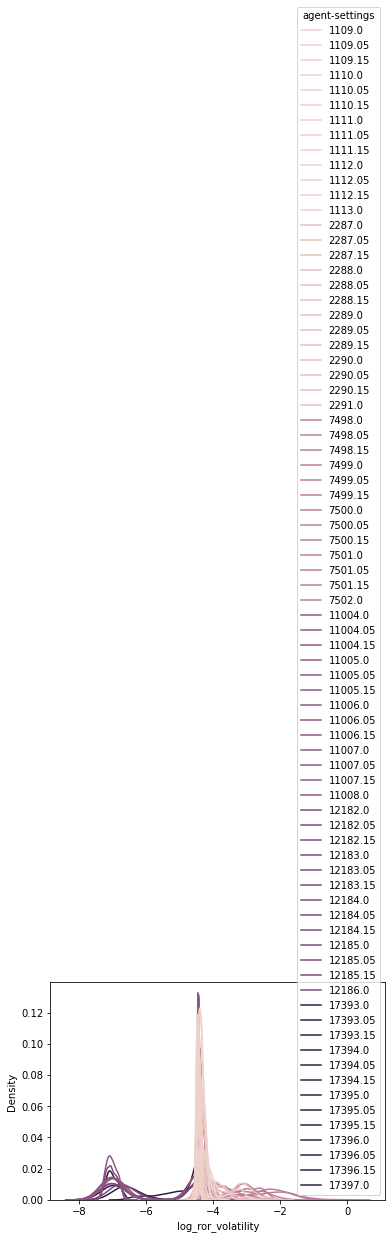

In [36]:
sns.kdeplot(
    data = ssr,
    x = 'log_ror_volatility',
    hue = 'agent-settings'
)

In [33]:
ssr['mmsize']

0          105
1          105
2          105
3          105
4        10000
         ...  
69115    10000
69116    10000
69117    10000
69118    10000
69119    10000
Name: mmsize, Length: 69120, dtype: int64

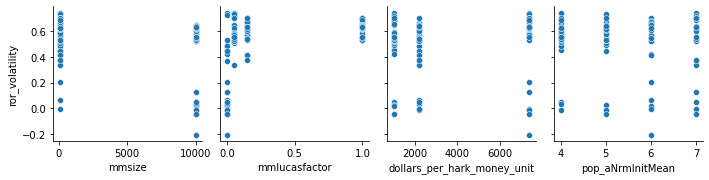

In [50]:
ssrx = ssr.groupby([
    'mmsize',
    "mmlucasfactor",
    'dollars_per_hark_money_unit',
    'pop_aNrmInitMean'
])[['ror_volatility','Expectations_RiskyStd_mean_final']].corr().reset_index()


sns.pairplot(
    data = ssrx[ssrx['level_4'] == 'Expectations_RiskyStd_mean_final'],
    x_vars = [
        'mmsize',
        "mmlucasfactor",
        'dollars_per_hark_money_unit',
        'pop_aNrmInitMean'
    ],
    y_vars = [
        'ror_volatility'
    ]
)


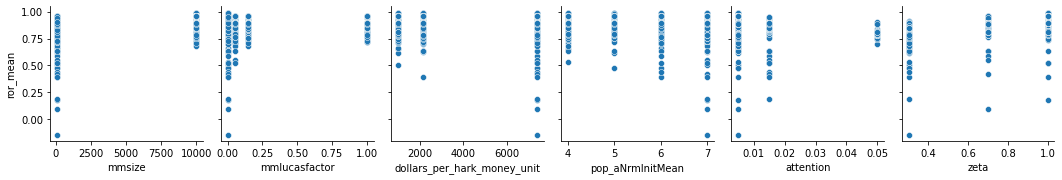

In [56]:
ssry = ssr.groupby([
    'mmsize',
    "mmlucasfactor",
    'dollars_per_hark_money_unit',
    'pop_aNrmInitMean',
    'attention',
    'zeta'
])[['ror_mean','Expectations_RiskyAvg_mean_final']].corr().reset_index()

ssry = ssry[ssry['level_6'] == 'Expectations_RiskyAvg_mean_final']

sns.pairplot(
    data = ssry[ssry['level_6'] == 'Expectations_RiskyAvg_mean_final'],
    x_vars = [
        'mmsize',
        "mmlucasfactor",
        'dollars_per_hark_money_unit',
        'pop_aNrmInitMean',
        'attention',
        'zeta'
    ],
    y_vars = [
        'ror_mean'
    ]
)

<Axes: xlabel='ror_mean', ylabel='Density'>

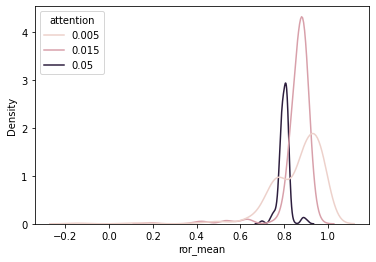

In [59]:
sns.kdeplot(
    data = ssry,
    x = 'ror_mean',
    hue = 'attention'
)

<Axes: xlabel='ror_mean', ylabel='Density'>

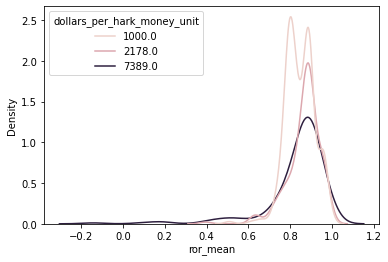

In [61]:
sns.kdeplot(
    data = ssry,
    x = 'ror_mean',
    hue = 'dollars_per_hark_money_unit'
)

In [56]:
ssr.columns

Index(['Unnamed: 0', 'PartitionKey', 'RowKey',
       'Expectations_RiskyAvg_mean_final', 'Expectations_RiskyAvg_std_final',
       'Expectations_RiskyStd_mean_final', 'Expectations_RiskyStd_std_final',
       'aLvl_meanall', 'aLvl_stdall', 'ammps', 'ammps_config_cmd',
       'ammps_config_gen', 'attention', 'cmdBundle', 'delta_t1', 'delta_t2',
       'dividend_growth_rate', 'dividend_shock_std',
       'dollars_per_hark_money_unit', 'dphm', 'end_day', 'endtime',
       'expectations', 'experimentName', 'filename', 'idx_max_asset_price',
       'idx_max_buy_limit', 'idx_max_sell_limit', 'idx_min_asset_price',
       'inst_val_std', 'kurtosis_buy_limit', 'kurtosis_sell_limit',
       'log_return_DW_statistic', 'log_return_autocorrelation_from_DW',
       'log_return_squared_DW_statistic',
       'log_return_squared_autocorrelation_from_DW', 'mNrm_ratio_StE_meanall',
       'mNrm_ratio_StE_stdall', 'market_class', 'max_asset_price',
       'max_buy_limit', 'max_sell_limit', 'mean_asset_p

In [58]:
ssr[ssr['mmsize'] == 105]['pop_log_power']

0        10.907755
1        10.907755
2        10.907755
3        11.907755
14       12.907755
           ...    
69065    11.907755
69076    11.907755
69087    11.907755
69098    11.907755
69109    11.907755
Name: pop_log_power, Length: 34560, dtype: float64

In [59]:

from scipy.stats import zscore

In [60]:
zscore(ssr['attention']) - zscore(ssr['attention'])

0       -0.950255
1       -0.950255
2       -0.950255
3       -0.950255
4       -0.950255
           ...   
69115   -0.950255
69116   -0.950255
69117   -0.950255
69118   -0.950255
69119   -0.950255
Name: attention, Length: 69120, dtype: float64

(array([1.3704e+04, 1.5000e+01, 5.0000e+00, 6.0000e+00, 6.0000e+00,
        1.0000e+01, 9.0000e+00, 2.2000e+01, 3.6100e+03, 1.0008e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00,
        2.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 9.0000e+00, 3.8000e+01, 1.1400e+02, 1.2700e+02,
        8.5000e+01, 2.8000e+01, 1.1000e+01, 1.1000e+01, 1.4000e+01,
        2.3000e+01, 2.9000e+01, 6.1140e+03, 7.0900e+03, 6.0000e+00,
        8.0000e+00, 8.0000e+00, 7.0000e+00, 5.0000e+00, 6.0000e+00,
        2.0000e+00, 3.0000e+00, 4.0000e+00, 3.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00,
        5.0000e+00, 5.0000e+00, 1.5000e+01, 1.6000e+01, 2.2000e+01,
        3.2000e+01, 3.4000e+01, 3.4000e+01, 3.8000e+01, 5.0000e+01,
        4.0000e+01, 3.7000e+01, 3.4000e+01, 1.70

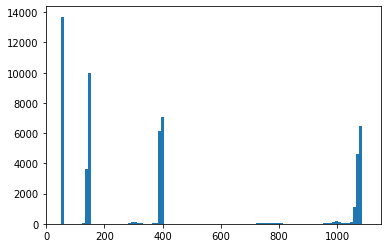

In [112]:
plt.hist(np.exp(ssr['pop_aNrmInitMean']) - ssr['aLvl_meanall'], bins=100)

In [110]:
(np.exp(ssr['pop_aNrmInitMean']) - ssr['aLvl_meanall'])

54740

In [ ]:
sns.kdeplot(
    data = ssr,
    x = 'log_ror_volatility',
    hue = 'agent-settings'
)